<a href="https://colab.research.google.com/github/bkvkrll/Data-analysis-algorithms/blob/main/lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [28]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [29]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [30]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [31]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [32]:
z = np.linspace(-10, 10, 101)

In [33]:
probabilities = sigmoid(z)

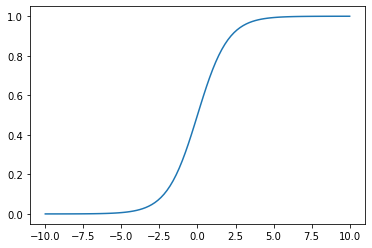

In [34]:
plt.plot(z, probabilities)
plt.show()

In [35]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [36]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.140535275330502
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.1034884426224387
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [37]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred, where=(y_pred!=0)) + (1.0 - y) * np.log(1.0 - y_pred, where=(1-y_pred!=0)))
    err = np.sum(err)
    return err

In [38]:
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.2])
calc_logloss(y1, y_pred1)

0.11157177565710485

 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [39]:
W = eval_model(X_st, y, iterations=5000, eta=42)

0 [-15.43753488 -61.07505588  -0.50228904 -22.25511343] 1.1785958344356262
500 [-252.19890598  -34.4848621   -63.34514697  221.376307  ] 0.007530457731680984
1000 [-254.09626212  -36.05501623  -68.54111214  219.48973536] 0.005770169003483429
1500 [-255.87406591  -35.33920588  -70.12622291  218.93275464] 0.005382132183353788
2000 [-257.60777494  -34.23380052  -71.04454859  218.61418236] 0.005135732659160815
2500 [-259.26232144  -33.18067408  -71.92020345  218.31265674] 0.004911651020712981
3000 [-260.84654397  -32.17263136  -72.75849817  218.02440438] 0.004706273272216319
3500 [-262.36647447  -31.20555527  -73.56273757  217.74794253] 0.0045172406660748225
4000 [-263.82714521  -30.27619117  -74.33560723  217.48228136] 0.004342665739901992
4500 [-265.2329736   -29.38171829  -75.07945013  217.22660172] 0.0041809566302819555


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [42]:
def calc_pred_proba(X, W):
    y_pred_proba = np.floor(sigmoid(np.dot(X, W)))
    return y_pred_proba

In [43]:
calc_pred_proba(X, W)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [44]:
def calc_pred(W, X, threshold):
    z = np.dot(X, W)
    y_pred = sigmoid(z)
    y_pred[y_pred > threshold] = 1
    y_pred[y_pred < 1] = 0
    return  y_pred

In [45]:
y_pred = calc_pred(W, X_st, 0.5)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])